# Homework 3 - Simple Momentum Strategy

1. Download daily price data for QQQ, TLT, GLD, RWO from yahoo finance since 2016-01-01. Using the adjusted close price data, compute daily returns. This should be a DataFrame with index=date, columns=ticker and values=daily returns.

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import math

In [12]:
univ = ['QQQ', 'TLT', 'GLD', 'RWO']
stock_px = yf.download(univ, start='2016-01-01', auto_adjust=False)
stock_px

[*********************100%***********************]  4 of 4 completed


Price        Adj Close                                         Close  \
Ticker             GLD         QQQ        RWO        TLT         GLD   
Date                                                                   
2016-01-04  102.889999  102.362061  33.485859  96.184341  102.889999   
2016-01-05  103.180000  102.184441  33.891556  95.796234  103.180000   
2016-01-06  104.669998  101.202919  33.630749  97.087128  104.669998   
2016-01-07  106.150002   98.033882  33.029423  97.261375  106.150002   
2016-01-08  105.680000   97.229950  32.529526  97.696983  105.680000   
...                ...         ...        ...        ...         ...   
2025-03-07  268.390015  491.790009  44.369999  90.110001  268.390015   
2025-03-10  266.040009  472.730011  43.849998  91.050003  266.040009   
2025-03-11  269.160004  471.600006  43.529999  90.400002  269.160004   
2025-03-12  270.329987  476.920013  43.529999  89.860001  270.329987   
2025-03-13  273.826202  472.518799  43.529999  89.764999  273.826202   

Price                                                High              ...  \
Ticker             QQQ        RWO         TLT         GLD         QQQ  ...   
Date                                                                   ...   
2016-01-04  109.500000  46.220001  121.449997  103.669998  109.599998  ...   
2016-01-05  109.309998  46.779999  120.959999  103.459999  110.180000  ...   
2016-01-06  108.260002  46.419998  122.589996  104.800003  108.889999  ...   
2016-01-07  104.870003  45.590000  122.809998  106.239998  107.290001  ...   
2016-01-08  104.010002  44.900002  123.360001  105.800003  106.290001  ...   
...                ...        ...         ...         ...         ...  ...   
2025-03-07  491.790009  44.369999   90.110001  270.339996  493.279999  ...   
2025-03-10  472.730011  43.849998   91.050003  268.440002  483.970001  ...   
2025-03-11  471.600006  43.529999   90.400002  269.730011  478.809998  ...   
2025-03-12  476.920013  43.529999   89.860001  271.230011  481.059998  ...   
2025-03-13  472.518799  43.529999   89.764999  273.920013  476.280090  ...   

Price             Low                    Open                         \
Ticker            RWO         TLT         GLD         QQQ        RWO   
Date                                                                   
2016-01-04  45.750000  121.320000  103.129997  109.449997  46.110001   
2016-01-05  46.209999  120.660004  103.129997  110.040001  46.209999   
2016-01-06  46.230000  122.050003  104.370003  107.410004  46.349998   
2016-01-07  45.520000  121.790001  105.830002  105.949997  45.900002   
2016-01-08  44.799999  122.230003  105.480003  105.629997  45.689999   
...               ...         ...         ...         ...        ...   
2025-03-07  43.930000   89.989998  269.089996  487.160004  44.250000   
2025-03-10  43.630001   90.910004  267.619995  483.450012  44.180000   
2025-03-11  43.220001   90.139999  268.470001  472.350006  44.000000   
2025-03-12  43.349998   89.779999  268.470001  479.160004  43.790001   
2025-03-13  43.515900   89.375000  271.570007  476.149994  43.439999   

Price                     Volume                              
Ticker             TLT       GLD       QQQ     RWO       TLT  
Date                                                          
2016-01-04  121.930000   6440000  50807600  787600  10591900  
2016-01-05  120.879997   3500300  38795200  243700   6242600  
2016-01-06  122.300003   9316600  41891100  148400   8916900  
2016-01-07  122.680000  11730400  61386300  131800  10202200  
2016-01-08  122.430000   7678200  69344000  244400   9577200  
...                ...       ...       ...     ...       ...  
2025-03-07   91.139999  10431200  54714700   51500  36903600  
2025-03-10   91.080002   7593900  76668000  128500  41440800  
2025-03-11   90.970001   8436600  68760800  278100  40555700  
2025-03-12   90.000000   7177600  46694400   83500  32691100  
2025-03-13   89.579903   2606990  12268332    8835   5680033  

[2312 

In [13]:
adj_close = stock_px['Adj Close']
returns = adj_close / adj_close.shift() - 1
returns

Ticker,GLD,QQQ,RWO,TLT
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.002819,-0.001735,0.012115,-0.004035
2016-01-06,0.014441,-0.009605,-0.007695,0.013475
2016-01-07,0.014140,-0.031314,-0.017880,0.001795
2016-01-08,-0.004428,-0.008201,-0.015135,0.004479
...,...,...,...,...
2025-03-07,0.000522,0.007354,0.006122,-0.003208
2025-03-10,-0.008756,-0.038756,-0.011720,0.010432
2025-03-11,0.011728,-0.002390,-0.007298,-0.007139


<Axes: xlabel='Date'>

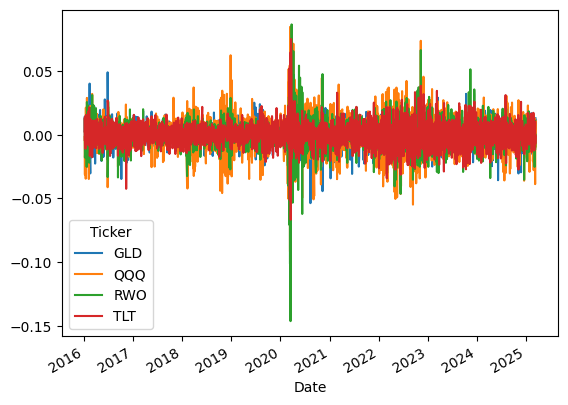

In [14]:
returns.plot()

2. Compute the signal. Complete the compute_momentum function which computes a simple momentum signal. The function takes in a DataFrame with index = date, columns=ticker and values containing daily returns. It returns a new DataFrame with index = date, columns=ticker and values containing the momentum signal for the ticker on that day. The momentum signal for each ticker is defined as the annualized sharpe ratio of the past 252 days.

In [15]:
def compute_momentum(ret):
    # fill out the body here
    # return a DataFrame "momentum" containing a simple momentum indicator 
    momentum = ret.rolling(252).mean()/ret.rolling(252).std()*math.sqrt(252)
    return momentum

In [16]:
momentum = compute_momentum(ret=returns)
momentum

Ticker,GLD,QQQ,RWO,TLT
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2025-03-07,2.083774,0.768888,0.696032,-0.052094
2025-03-10,1.971207,0.516853,0.562235,-0.019083
2025-03-11,2.006639,0.426077,0.490635,-0.063721


3. Create a portfolio. Complete the function compute_portfolio. This function takes as input the DataFrame "momentum" from above. It returns a new DataFrame "portfolio" which has the same index/columns and has as values portfolio weights. The weights are computed as follows. On each date, equal-weight long the tickers with a momentum signal above 1.

In [17]:
def compute_portfolio(momentum):
    # fill out the body here
    # return a DataFrame "portfolio" containing portfolio weights
    portfolio = (momentum > 1)*1
    portfolio = portfolio.div(portfolio.abs().sum(1), 0)

    return portfolio

portfolio = compute_portfolio(momentum)
portfolio

Ticker,GLD,QQQ,RWO,TLT
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2025-03-07,1.0,0.0,0.0,0.0
2025-03-10,1.0,0.0,0.0,0.0
2025-03-11,1.0,0.0,0.0,0.0


4. Portfolio returns. Using the "portfolio" returned in part(3) and the returns generated in part(1), compute the returns to the simple momentum strategy. 
- What is the annualized sharpe ratio of the strategy? 
- How about the annualized sharpe ratio within each year? 
- How correlated is the strategy with the underlying tickers?
- Plot the cumulative sum of the returns through time

In [18]:
strategy_returns = (portfolio.shift() * returns).sum(1)
strategy_returns = strategy_returns.loc[momentum.dropna().index[0]:]
strategy_returns


Date
2017-01-03    0.000000
2017-01-04    0.000000
2017-01-05    0.000000
2017-01-06    0.000000
2017-01-09    0.003281
                ...   
2025-03-07    0.000522
2025-03-10   -0.008756
2025-03-11    0.011728
2025-03-12    0.004347
2025-03-13    0.012933
Length: 2060, dtype: float64

In [19]:
sharpe = strategy_returns.mean()/strategy_returns.std() * math.sqrt(252)
sharpe

1.1105888755311917

In [20]:
sharpe = lambda x: x.mean()/x.std()*math.sqrt(252)
strategy_returns.groupby([x.year for x in strategy_returns.index]).apply(sharpe)

2017    2.670448
2018   -0.025001
2019    1.015499
2020    1.528312
2021    1.411044
2022   -0.737296
2023    1.171867
2024    1.802068
2025    2.722478
dtype: float64

In [21]:
returns.corrwith(strategy_returns)

Ticker
GLD    0.353171
QQQ    0.467675
RWO    0.251245
TLT    0.200101
dtype: float64

In [22]:
returns.corr()

Ticker,GLD,QQQ,RWO,TLT
Ticker,,,,
GLD,1.000000,0.071310,0.156898,0.313912
QQQ,0.071310,1.000000,0.593459,-0.127467
RWO,0.156898,0.593459,1.000000,0.004672
TLT,0.313912,-0.127467,0.004672,1.000000


<Axes: xlabel='Date'>

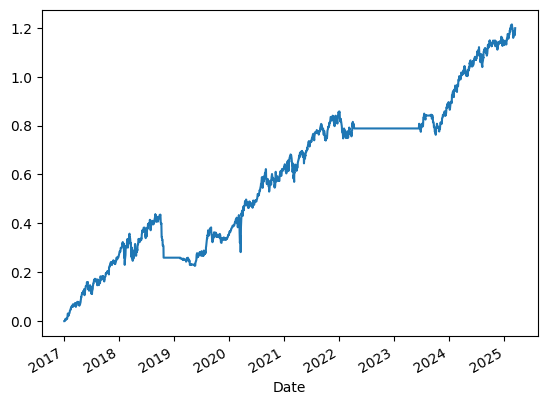

In [23]:
strategy_returns.cumsum().plot()

<Axes: xlabel='Date'>

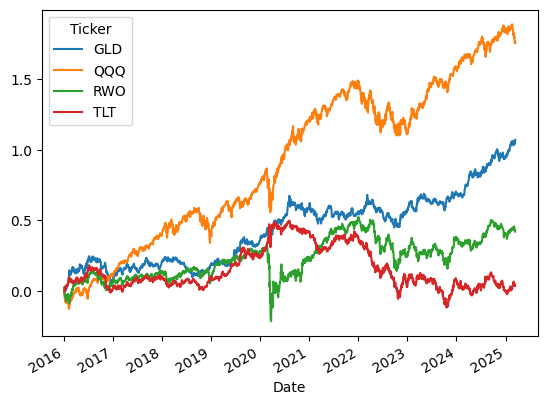

In [24]:
returns.cumsum().plot()

In [25]:
returns

Ticker,GLD,QQQ,RWO,TLT
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.002819,-0.001735,0.012115,-0.004035
2016-01-06,0.014441,-0.009605,-0.007695,0.013475
2016-01-07,0.014140,-0.031314,-0.017880,0.001795
2016-01-08,-0.004428,-0.008201,-0.015135,0.004479
...,...,...,...,...
2025-03-07,0.000522,0.007354,0.006122,-0.003208
2025-03-10,-0.008756,-0.038756,-0.011720,0.010432
2025-03-11,0.011728,-0.002390,-0.007298,-0.007139
